<a href="https://colab.research.google.com/github/lazyPrakhar/Data-Science-demos/blob/develop/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv("bike_data.txt");
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


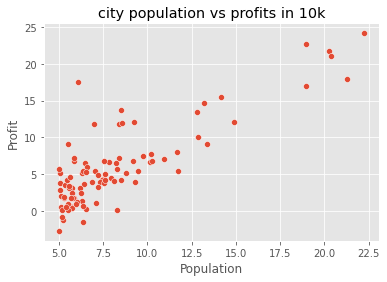

In [5]:
ax= sns.scatterplot(x="Population",y="Profit",data=data)
ax.set_title("city population vs profits in 10k");

In [6]:
def cost_func(x,y,theta):
  m = len(y);
  y_pred = x.dot(theta);
  error = (y_pred - y) ** 2;
  return 1 / (2 * m) * np.sum(error)

In [12]:
m = data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y =  data.Profit.values.reshape(m,1);
theta = np.zeros((2,1))
cost_func(X,y,theta)

32.072733877455676

In [14]:
def gradient_descent(x,y,theta,alpha,iterations):
  m = len(y);
  costs = []
  for i in range(iterations):
    y_pred = x.dot(theta)
    error = np.dot(x.transpose() , (y_pred - y))
    theta -= alpha * (1/m) * error 
    costs.append(cost_func(x,y,theta))
  return theta,costs

In [20]:
 theta, costs = gradient_descent(X,y,theta,alpha=0.01,iterations=4500)
 print("h(x) = {} + {}x1".format(str(round(theta[0,0],4)), 
                                 str(round(theta[1,0],4))))
 


h(x) = -3.8958 + 1.193x1


In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
theta_0 = np.linspace(-100,100,100)
theta_1 = np.linspace(-10,10,100)

cost_values = np.zeros((len(theta_0),len(theta_1)))


for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i],theta_1[j]])
    cost_values[i,j] = cost_func(X,y,t)


ValueError: ignored

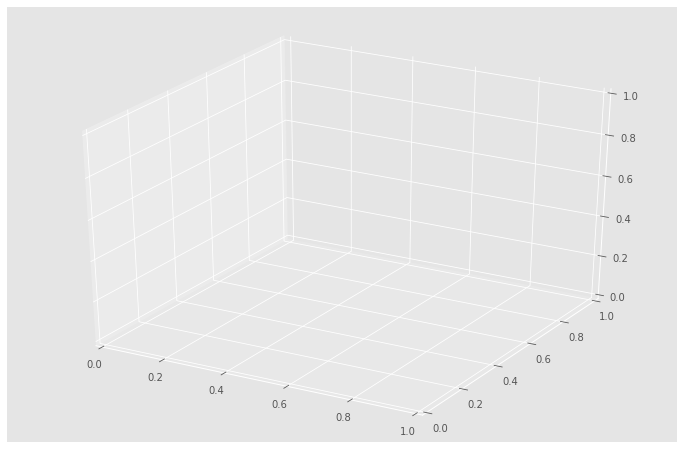

In [29]:
fig = plt.figure(figsize= (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')

fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

plt.view_int(30,330)
plt.show()